In [1]:
import os
import time
import sys
import scipy
import glob
import importlib
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

from datetime import datetime

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [2]:
util.set_sns_style(style='dark')
%matplotlib notebook

rootdir = util.get_rootdir()
rootdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data'

In [234]:
#srcdir = '/mnt/minerva/plume-tracking/behavior-logfiles'
srcdir = '/mnt/minerva/tethered-tap/behavior'

logdir = os.path.join(srcdir, 'logfiles')

figdir = os.path.join(srcdir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)
print("Saving figures to: {}".format(figdir))


#ftstamp = '20230214-1435'
# ftstamp = '20230214-1355'
ftstamp = '20230215-1627'
if ftstamp=='20230214-1355':
    cdict = {
        '20230214-1350': 'dark-tap-closedloop',
        '20230214-1355': 'dark-tap-openloop',
        '20230214-1422': 'dark-tap-openloop',
        '20230214-1435': 'dark-tap-closedloop',
    #     '20230214-1515': 'dark-tap-closedloop'
    }
elif ftstamp=='20230215-1627':
    cdict = {
        '20230215-1627': 'dark-tap-closedloop-ledoff',
        '20230215-1646': 'dark-tap-closedloop-ledon',
        '20230215-1723': 'dark-notap-closedloop-ledon',
    }

# curr_cond = cdict[ftstamp]

# found_logfiles = sorted(glob.glob(os.path.join(logdir, '{}*.log'.format(ftstamp))), key=util.natsort)
# for fi, fn in enumerate(found_logfiles):
#     print('{}: {}'.format(fi, os.path.split(fn)[-1]))

Saving figures to: /mnt/minerva/tethered-tap/behavior/figures


0: 20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000.log
/mnt/minerva/tethered-tap/behavior/logfiles/20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000.log


<IPython.core.display.Javascript object>


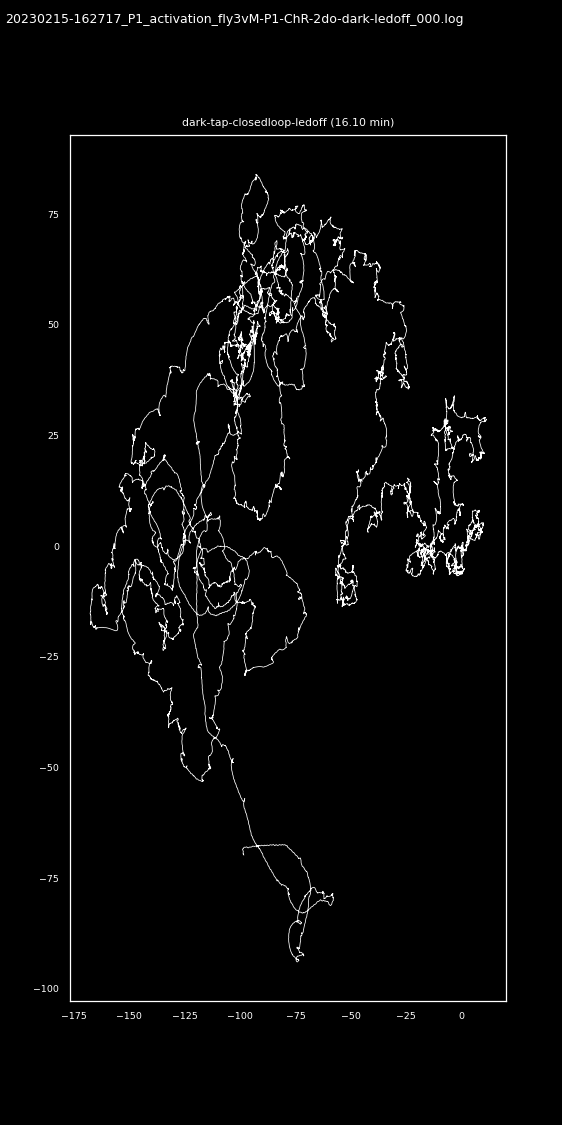

20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000
0: 20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000.log
/mnt/minerva/tethered-tap/behavior/logfiles/20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000.log


<IPython.core.display.Javascript object>


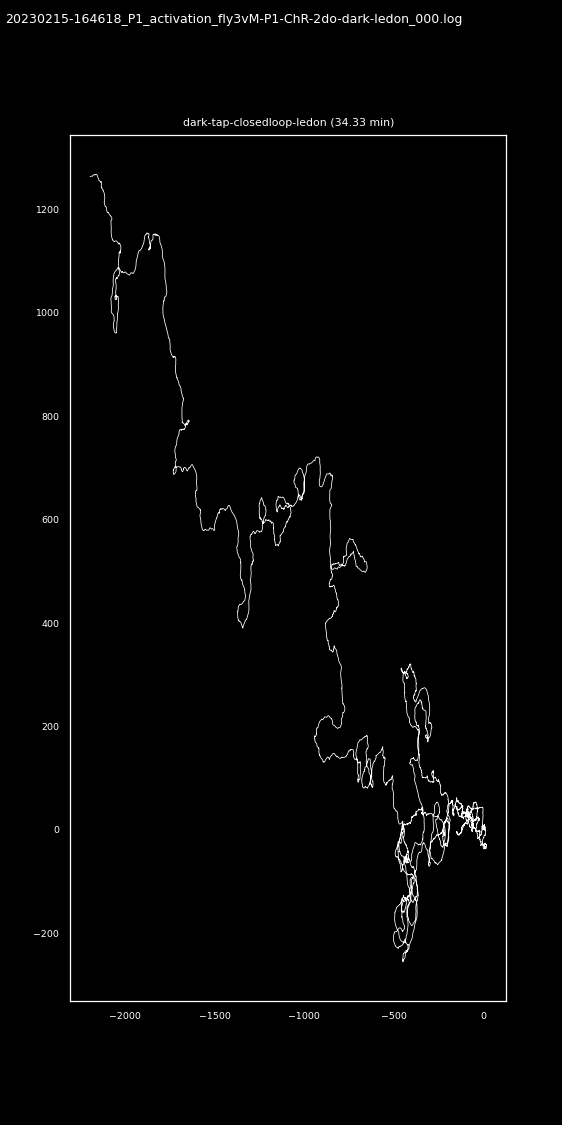

20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000
0: 20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000.log
/mnt/minerva/tethered-tap/behavior/logfiles/20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000.log


<IPython.core.display.Javascript object>


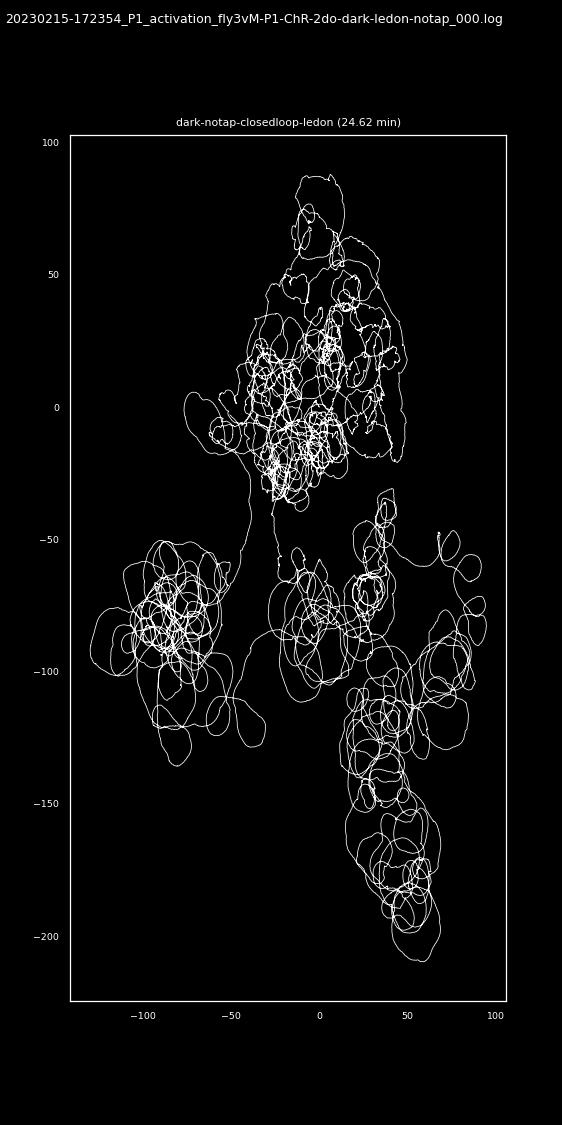

20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000
(177324, 40)


,index,timestamp -- motor_step_command,mfc1_stpt,mfc2_stpt,mfc3_stpt,led1_stpt,led2_stpt,sig_status,ft_posx,ft_posy,...,trial,fly_id,trial_id,cum_time,speed,upwind_speed,crosswind_speed,euclid_dist,upwind_dist,crosswind_dist
0,1,02/15/2023-16:27:17.719977 -- 800000,0.0,0.0,0.0,0.0,0.0,1,-0.002683,-0.000586,...,20230215-162717,20230215-fly3v,20230215-fly3v_20230215-162717,0.000000,7.112330,-5.373224,4.659796,NaN,NaN,NaN
1,2,02/15/2023-16:27:17.724968 -- 799999,0.0,0.0,0.0,0.0,0.0,0,0.020574,-0.027404,...,20230215-162717,20230215-fly3v,20230215-fly3v_20230215-162717,0.004991,5.952850,-2.750320,5.279410,0.035498,-0.026818,0.023257
2,3,02/15/2023-16:27:17.730087 -- 799999,0.0,0.0,0.0,0.0,0.0,1,0.050692,-0.028392,...,20230215-162717,20230215-fly3v,20230215-fly3v_20230215-162717,0.015101,17.381599,16.986776,-3.683673,0.030134,-0.000988,0.030118
3,4,02/15/2023-16:27:17.735363 -- 800000,0.0,0.0,0.0,0.0,0.0,0,-0.017718,0.149175,...,20230215-162717,20230215-fly3v,20230215-fly3v_20230215-162717,0.030487,20.938907,17.220640,-11.911649,0.190289,0.177566,0.068410
4,5,02/15/2023-16:27:17.741472 -- 800001,0.0,0.0,0.0,0.0,0.0,1,-0.084922,0.167665,...,20230215-162717,20230215-fly3v,20230215-fly3v_20230215-162717,0.051982,11.940128,3.262280,-11.485826,0.069701,0.018490,0.067203


In [235]:
xvar='ft_posx'
yvar='ft_posy'

dlist=[]
for ftstamp, curr_cond in cdict.items():

    found_logfiles = sorted(glob.glob(os.path.join(logdir, '{}*.log'.format(ftstamp))), key=util.natsort)
    for fi, fn in enumerate(found_logfiles):
        print('{}: {}'.format(fi, os.path.split(fn)[-1]))

    fpath = found_logfiles[0]
    print(fpath)

    df0 = butil.load_dataframe(fpath, is_odor=False)
    # process some stuff
    df0 = butil.calculate_speed(df0, xvar=xvar, yvar=yvar)
    df0 = butil.calculate_distance(df0, xvar=xvar, yvar=yvar)
    df0['condition'] = curr_cond

    fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]

    fig, ax = pl.subplots(figsize=(5, 10))
    dur_min = df0['rel_time'].max() / 60.
    # sns.lineplot(x='ft_posx', y='ft_posy', data=df_, ax=ax)
    ax.plot(df0['ft_posx'], df0['ft_posy'], lw=0.5, c='w')
    ax.set_title('{} ({:.2f} min)'.format(curr_cond, dur_min))

    util.label_figure(fig, '{}'.format(os.path.split(fpath)[-1]))
    figname = '{}'.format(fly_id)
    print(figname)

    pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)
    
    dlist.append(df0)
print(df0.shape)
df = pd.concat(dlist, axis=0).reset_index(drop=True)
df.head()

In [244]:
df.columns

Index(['index', 'timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'sig_status', 'ft_posx',
       'ft_posy', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'ft_heading', 'instrip', 'filename', 'fpath', 'timestamp',
       'motor_step_command', 'time', 'rel_time', 'date', 'odor_on',
       'strip_type', 'led_on', 'experiment', 'fly_name', 'condition', 'trial',
       'fly_id', 'trial_id', 'cum_time', 'speed', 'upwind_speed',
       'crosswind_speed', 'euclid_dist', 'upwind_dist', 'crosswind_dist',
       'duration_min'],
      dtype='object')

In [245]:
fly_id = df['fly_id'].unique()[0]
print(fly_id)
fig_id = srcdir
print(fig_id)

20230215-fly3v
/mnt/minerva/tethered-tap/behavior


In [246]:
speed_min, speed_max = df['speed'].min(), df['speed'].max()
print("Speed: {:.2f} - {:.2f} mm/s".format(speed_min, speed_max))
speed_max = 40

dur_min, dur_max = df['rel_time'].min()/60., df['rel_time'].max()/60.
print("Duration: {:.2f} - {:.2f} min".format(dur_min, dur_max))
df['duration_min'] = df['rel_time']/60.

Speed: 0.00 - 126.54 mm/s
Duration: 0.00 - 34.33 min


In [373]:
hue_var = 'duration_min'
# ----------------------------------------------------
# if hue_var == 'duration_min':
#     hue_min, hue_max = dur_min, dur_max
#     palette='viridis'
# elif hue_var == 'speed':
hue_min, hue_max = df[hue_var].min(), df[hue_var].max()
if hue_var == 'speed':
    palette='viridis' #'viridis'
    hue_min = 0
    hue_max=30
elif hue_var == 'duration_min':
    hue_min = 0
    hue_max = 30
    palette='viridis'
else:
    palette='coolwarm' #'viridis'
    hue_min = -30
    hue_max=30
    
print("Hue: {} ({:.2f}, {:.2f})".format(hue_var, hue_min, hue_max))


Hue: duration_min (0.00, 30.00)


### traj by speed or dur

<IPython.core.display.Javascript object>


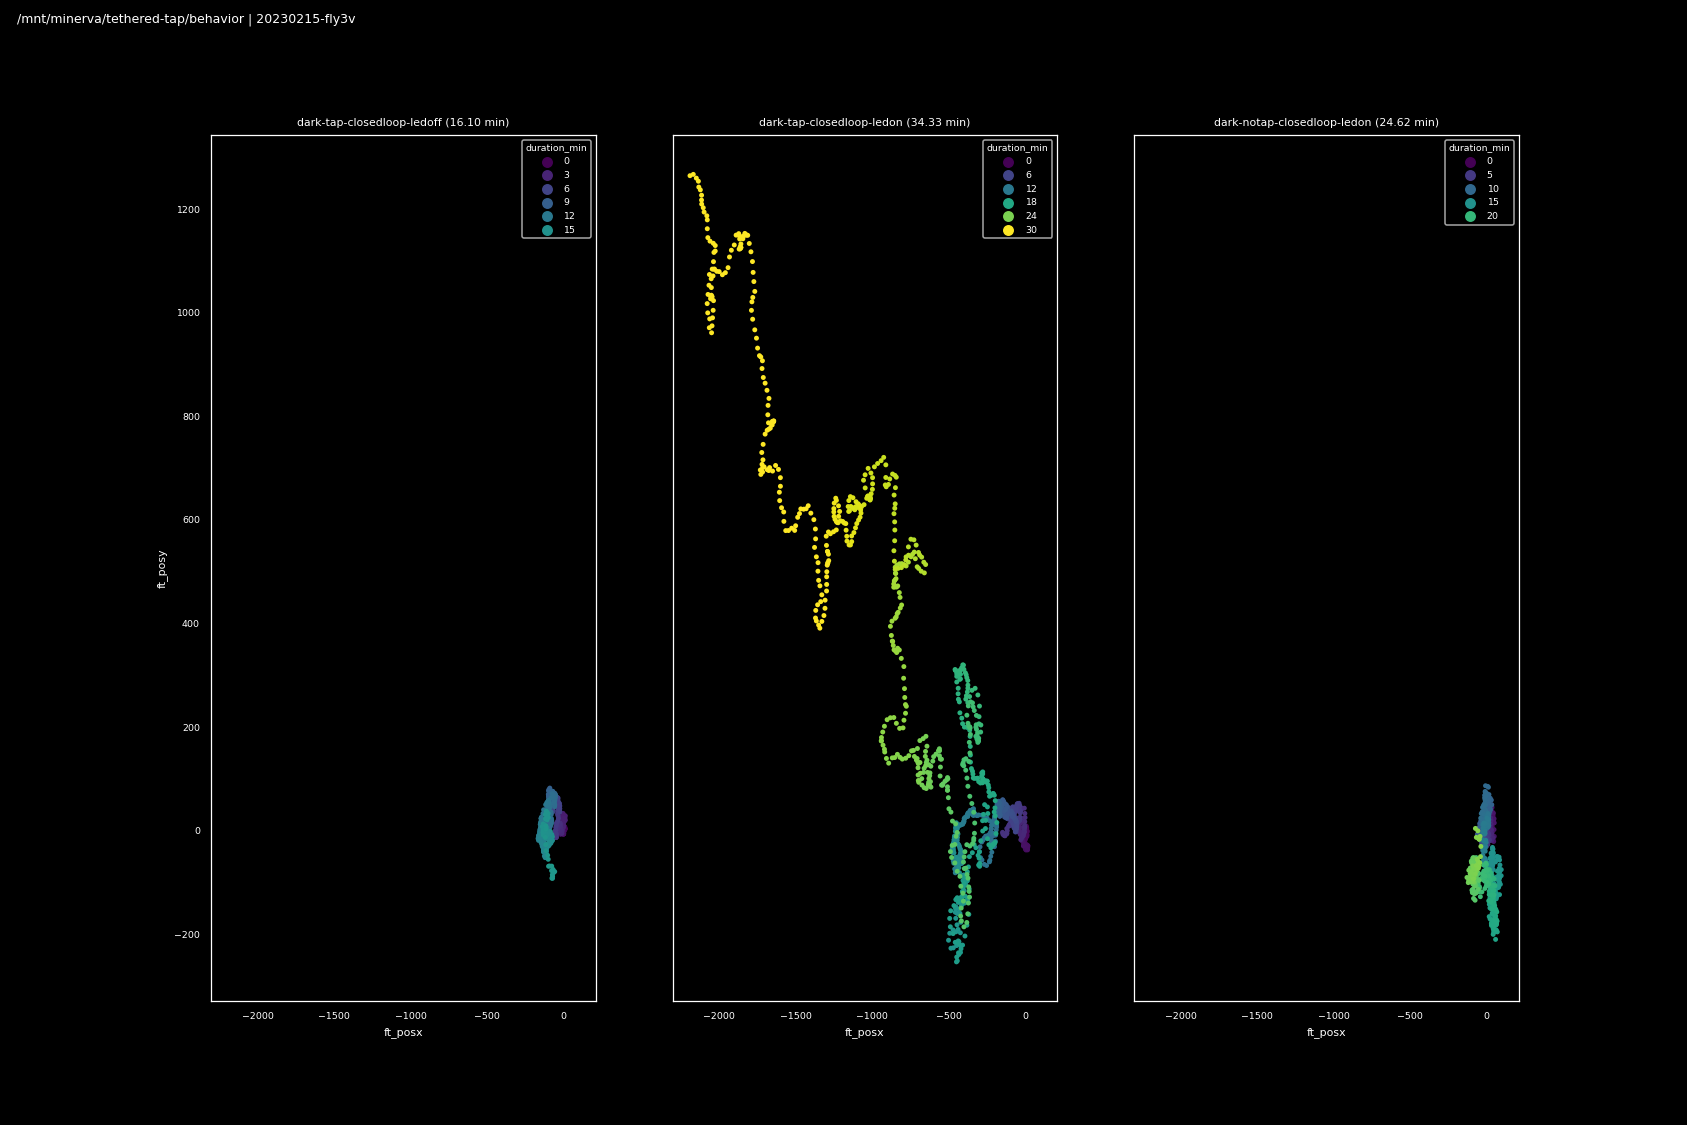

20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000
20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000
20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000
20230215-fly3v_hue-duration_min


In [374]:
fnames = df['filename'].unique()
fig, axn = pl.subplots(1, len(fnames), figsize=(15,10), sharey=True, sharex=True)

for fi, (fp, df_) in enumerate(df.groupby('filename')):
    print(fp)
    ax=axn[fi]
    exp_dur = df_['rel_time'].max() / 60.
    curr_cond = df_['condition'].unique()[0]
    
    #ax.plot(df0['ft_posx'], df0['ft_posy'], lw=0.5, c='w')
    sns.scatterplot(data=df_.iloc[0::200], ax=ax, x='ft_posx', y='ft_posy', hue=hue_var, hue_norm=(hue_min, hue_max), palette=palette, edgecolor='none', s=10, alpha=1)
    ax.set_title('{} ({:.2f} min)'.format(curr_cond, exp_dur))

util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_hue-{}'.format(fly_id, hue_var)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)


## first X min 

<IPython.core.display.Javascript object>


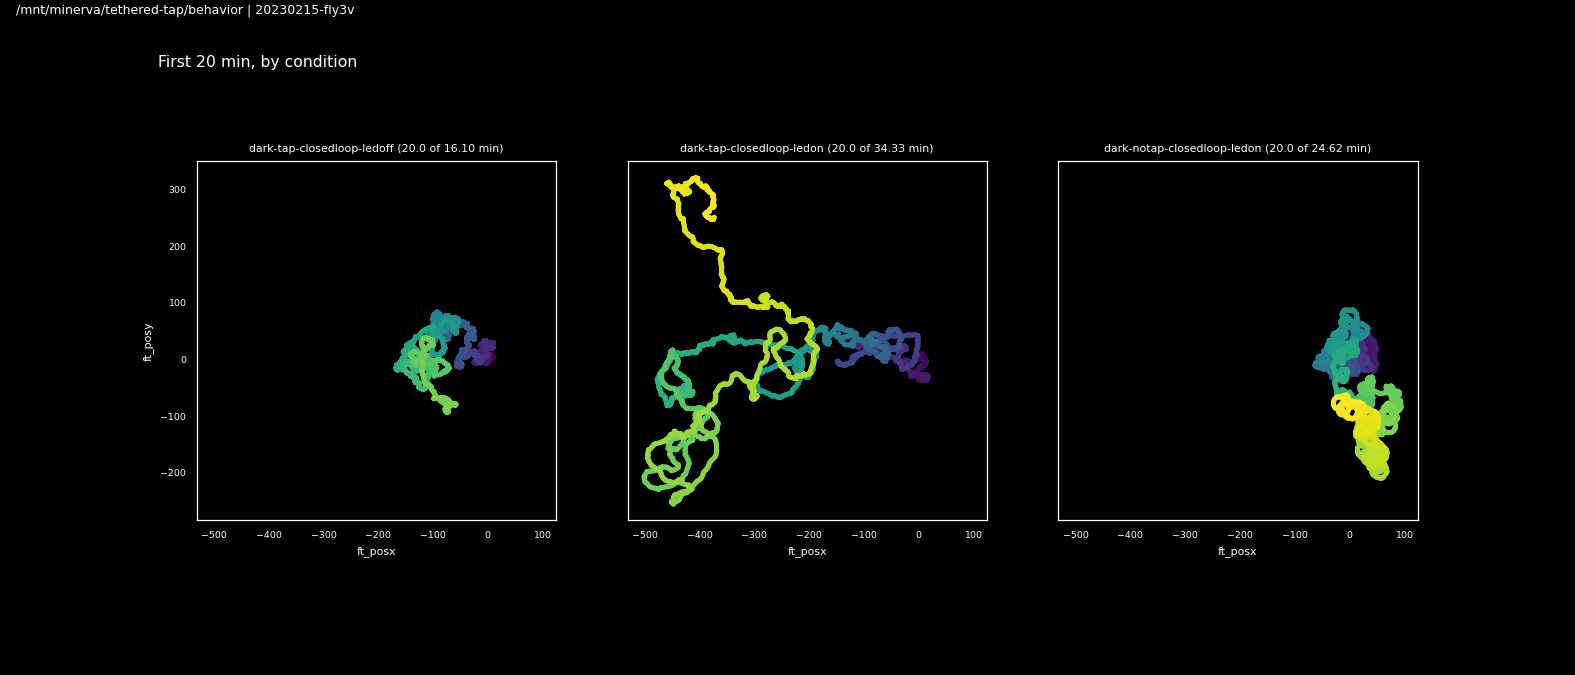

20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000
20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000
20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000
20230215-fly3v_hue-duration_min_first-20min


In [258]:
look_dur=20

fnames = df['filename'].unique()
fig, axn = pl.subplots(1, len(fnames), figsize=(14,6), sharey=True, sharex=True)

for fi, (fp, df_) in enumerate(df.groupby('filename')):
    print(fp)
    ax=axn[fi]
    exp_dur = df_['rel_time'].max() / 60.
    curr_cond = df_['condition'].unique()[0]
    
    plotdf = df_[df_['duration_min']<=look_dur].iloc[0::10].copy()
    sns.scatterplot(data=plotdf, ax=ax, x='ft_posx', y='ft_posy', hue=hue_var, hue_norm=(hue_min, look_dur), palette=palette, edgecolor='none', s=10, alpha=0.9, legend=False)
    ax.set_title('{} ({:.1f} of {:.2f} min)'.format(curr_cond, look_dur, exp_dur))
    ax.set_box_aspect(1)
    
fig.text(0.1, 0.9, 'First {} min, by condition'.format(look_dur))
    
util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_hue-{}_first-{}min'.format(fly_id, hue_var, look_dur)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)


## heading

<IPython.core.display.Javascript object>


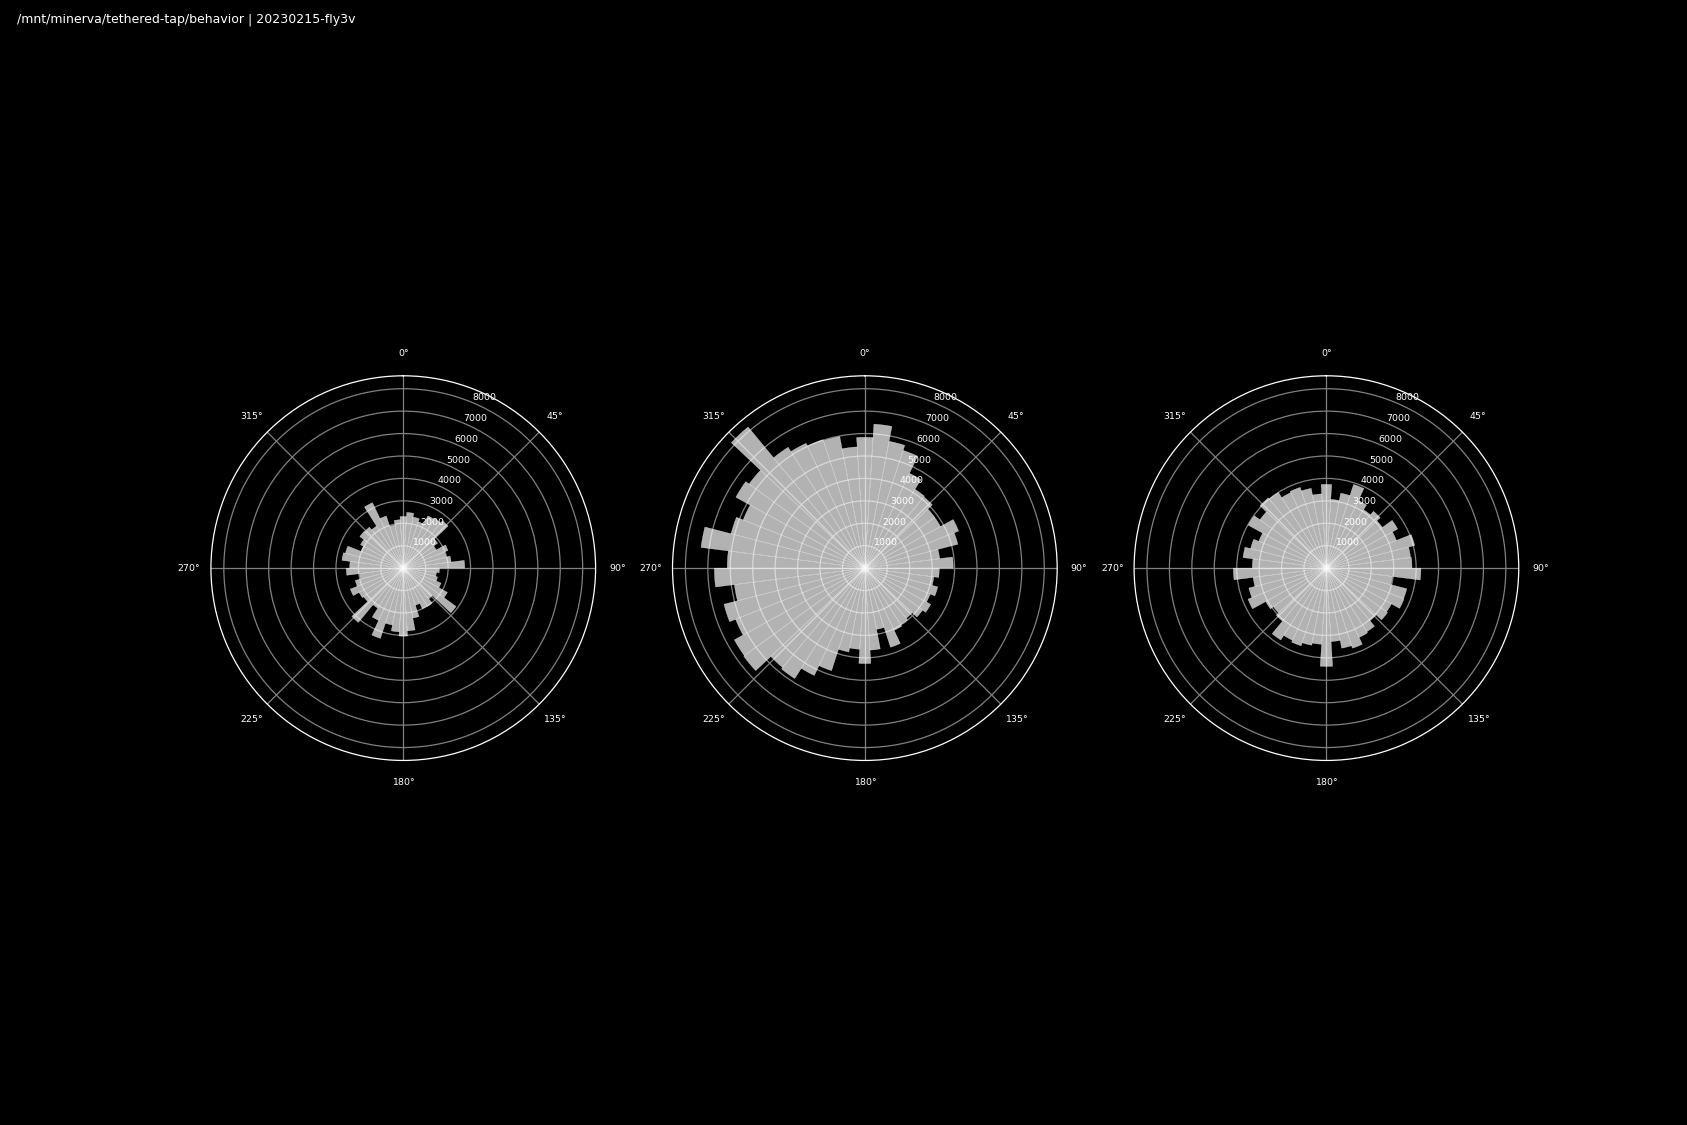

20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000
20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000
20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000
20230215-fly3v_heading


In [264]:
#fig, axn = pl.subplots(1, 2, figsize=(7,4), subplot_kw={'projection': 'polar'})
fig, axn = pl.subplots(1, len(fnames), figsize=(15,10), sharey=True, sharex=True, subplot_kw={'projection': 'polar'})
for fi, (fp, df_) in enumerate(df.groupby('filename')):
    print(fp)
    ax=axn[fi]
    util.circular_hist(ax, df_['ft_heading'].values, bins=50,
                   facecolor='w', density=False, edgecolor='w', lw=0.25)
    
util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_heading'.format(fly_id)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)


In [305]:
colors = ['aquamarine', 'lightskyblue', 'violet']
pal = dict((k, v) for k, v in zip(currdf['condition'].unique(), colors))

<IPython.core.display.Javascript object>


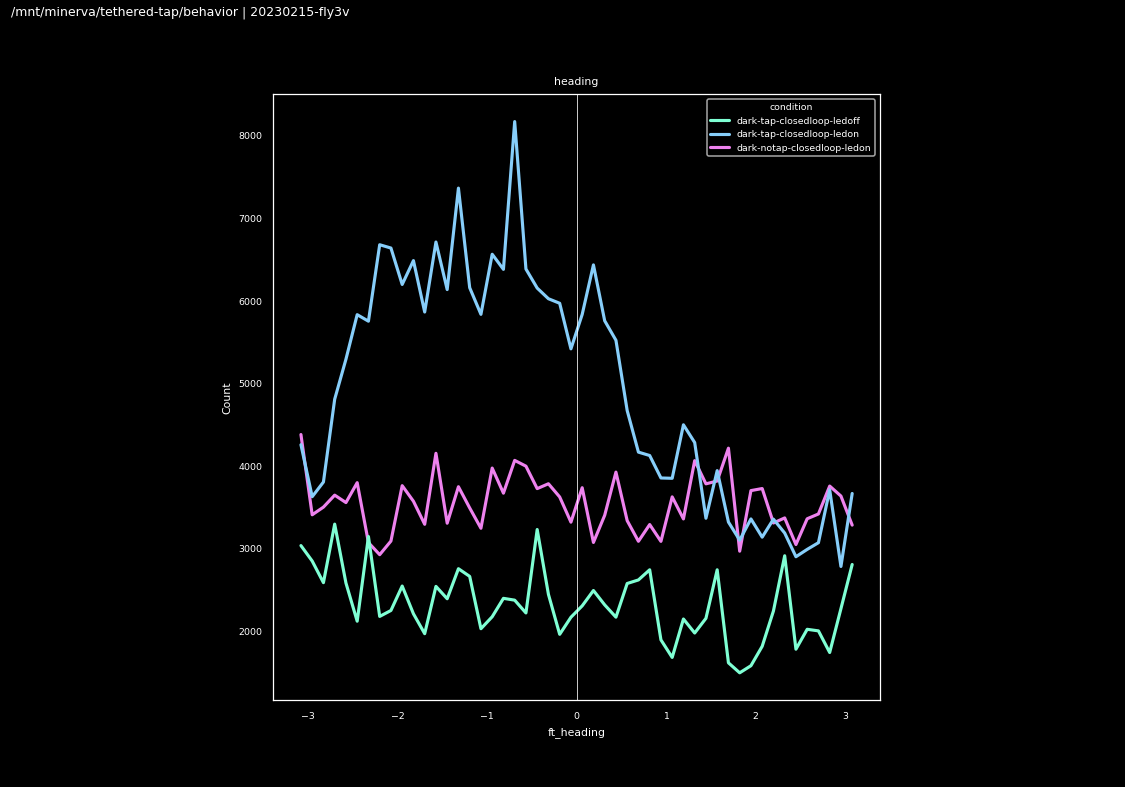

20230215-fly3v_heading-hist


In [306]:

fnames = ['20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000', '20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000']
#fnames = ['20230214-135500_P1_activation_fly1vM-cs-4do_002', '20230214-143528_P1_activation_fly1vM-cs-4do_004']

currdf = df.copy() #df[df['filename'].isin(fnames)].copy()
currdf.shape

fig, ax = pl.subplots(figsize=(10,7)) #, subplot_kw={'projection': 'polar'})

sns.histplot(data=currdf, x='ft_heading', hue='condition', bins=50, ax=ax, linewidth=2, element='poly', fill=False, palette=pal)
ax.axvline(x=0, color='w', lw=0.5)
ax.set_title('heading')
ax.set_box_aspect(1)

util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_heading-hist'.format(fly_id)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)


<IPython.core.display.Javascript object>


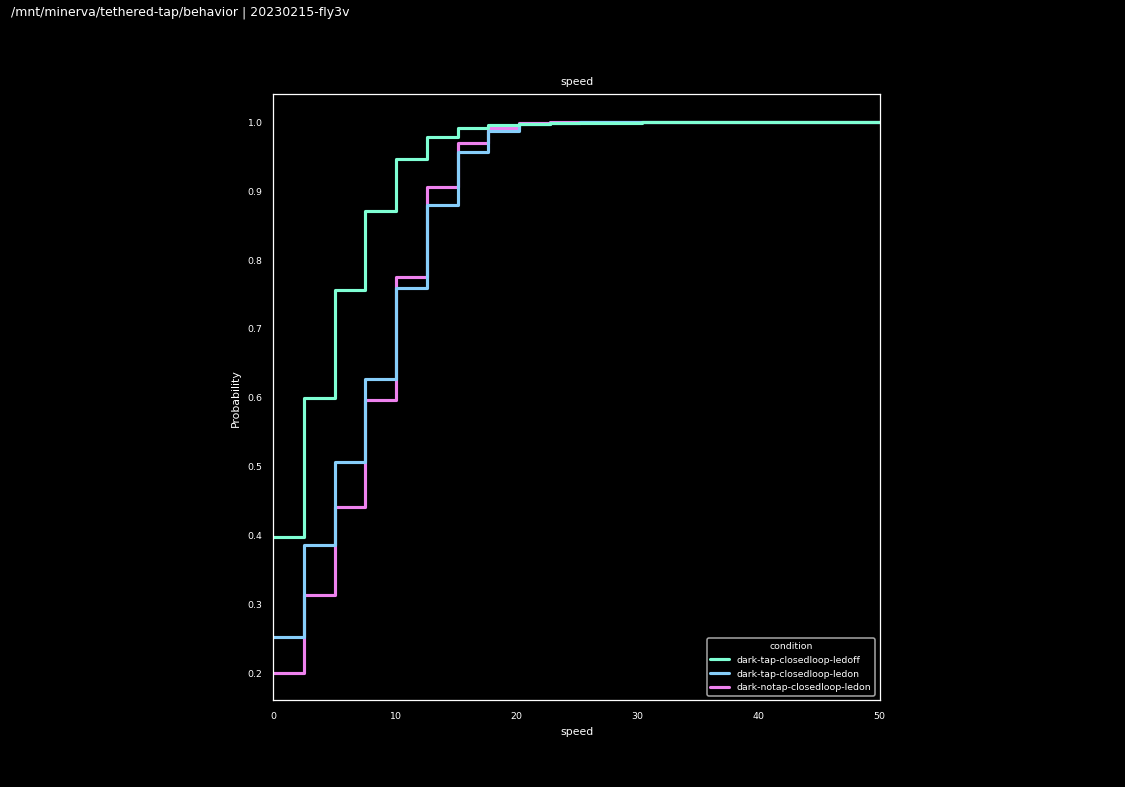

20230215-fly3v_speed-hist


In [317]:
currdf = df.copy() #df[df['filename'].isin(fnames)].copy()
currdf.shape

fig, ax = pl.subplots(figsize=(10,7)) #, subplot_kw={'projection': 'polar'})

sns.histplot(data=currdf, x='speed', hue='condition', bins=50, ax=ax, linewidth=2, element='step', kde=False, fill=False, palette=pal, cumulative=True, common_norm=False, stat='probability')
ax.axvline(x=0, color='w', lw=0.5)
ax.set_title('speed')
ax.set_box_aspect(1)
ax.set_xlim([0, 50])

util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_speed-hist'.format(fly_id)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)


In [422]:
vmin, vmax = df['ft_heading'].min(), df['ft_heading'].max()
labels_heading = np.linspace(vmin, vmax, 10)
bins_heading = np.linspace(vmin, vmax, 10)

In [423]:

labels = np.arange(0, 50)
print(len(labels))
df['binned_speed'] = pd.cut(df['speed'], bins=50, labels=labels)
df['binned_heading'] = pd.cut(df['ft_heading'], bins=bins_heading, labels=labels_heading[0:-1])


50


<IPython.core.display.Javascript object>


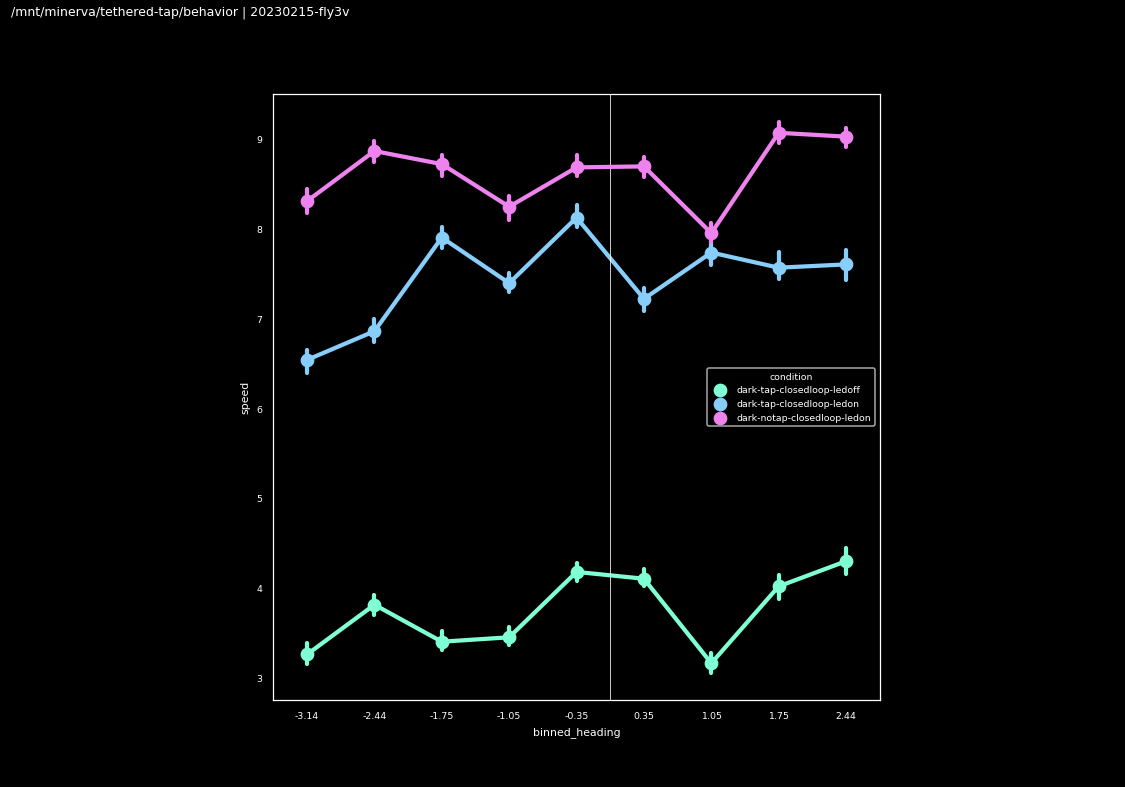

20230215-fly3v_speed-by-heading


In [427]:
from matplotlib.ticker import FormatStrFormatter

#df.groupby(['condition', 'binned_heading'])['speed'].mean()

fig, ax = pl.subplots(figsize=(10,7)) 
sns.pointplot(data=df, hue='condition', x='binned_heading', y='speed', ax=ax, palette=pal, estimator='median')
xvar_names = sorted(df['binned_heading'].unique())[0:-1]
ax.set_xticklabels(['{:.2f}'.format(i) for i in xvar_names])
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.axvline(x=4.5, color='w', lw=0.5)
ax.set_box_aspect(1)


util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_speed-by-heading'.format(fly_id)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)


In [403]:
len(xvar_names)

10

In [394]:
bins_heading

array([-3.14157747, -2.92491646, -2.70825544, -2.49159443, -2.27493341,
       -2.0582724 , -1.84161138, -1.62495037, -1.40828935, -1.19162834,
       -0.97496732, -0.75830631, -0.5416453 , -0.32498428, -0.10832327,
        0.10833775,  0.32499876,  0.54165978,  0.75832079,  0.97498181,
        1.19164282,  1.40830384,  1.62496485,  1.84162586,  2.05828688,
        2.27494789,  2.49160891,  2.70826992,  2.92493094,  3.14159195])

(247250, 41)
['dark-tap-closedloop-ledon']


<IPython.core.display.Javascript object>


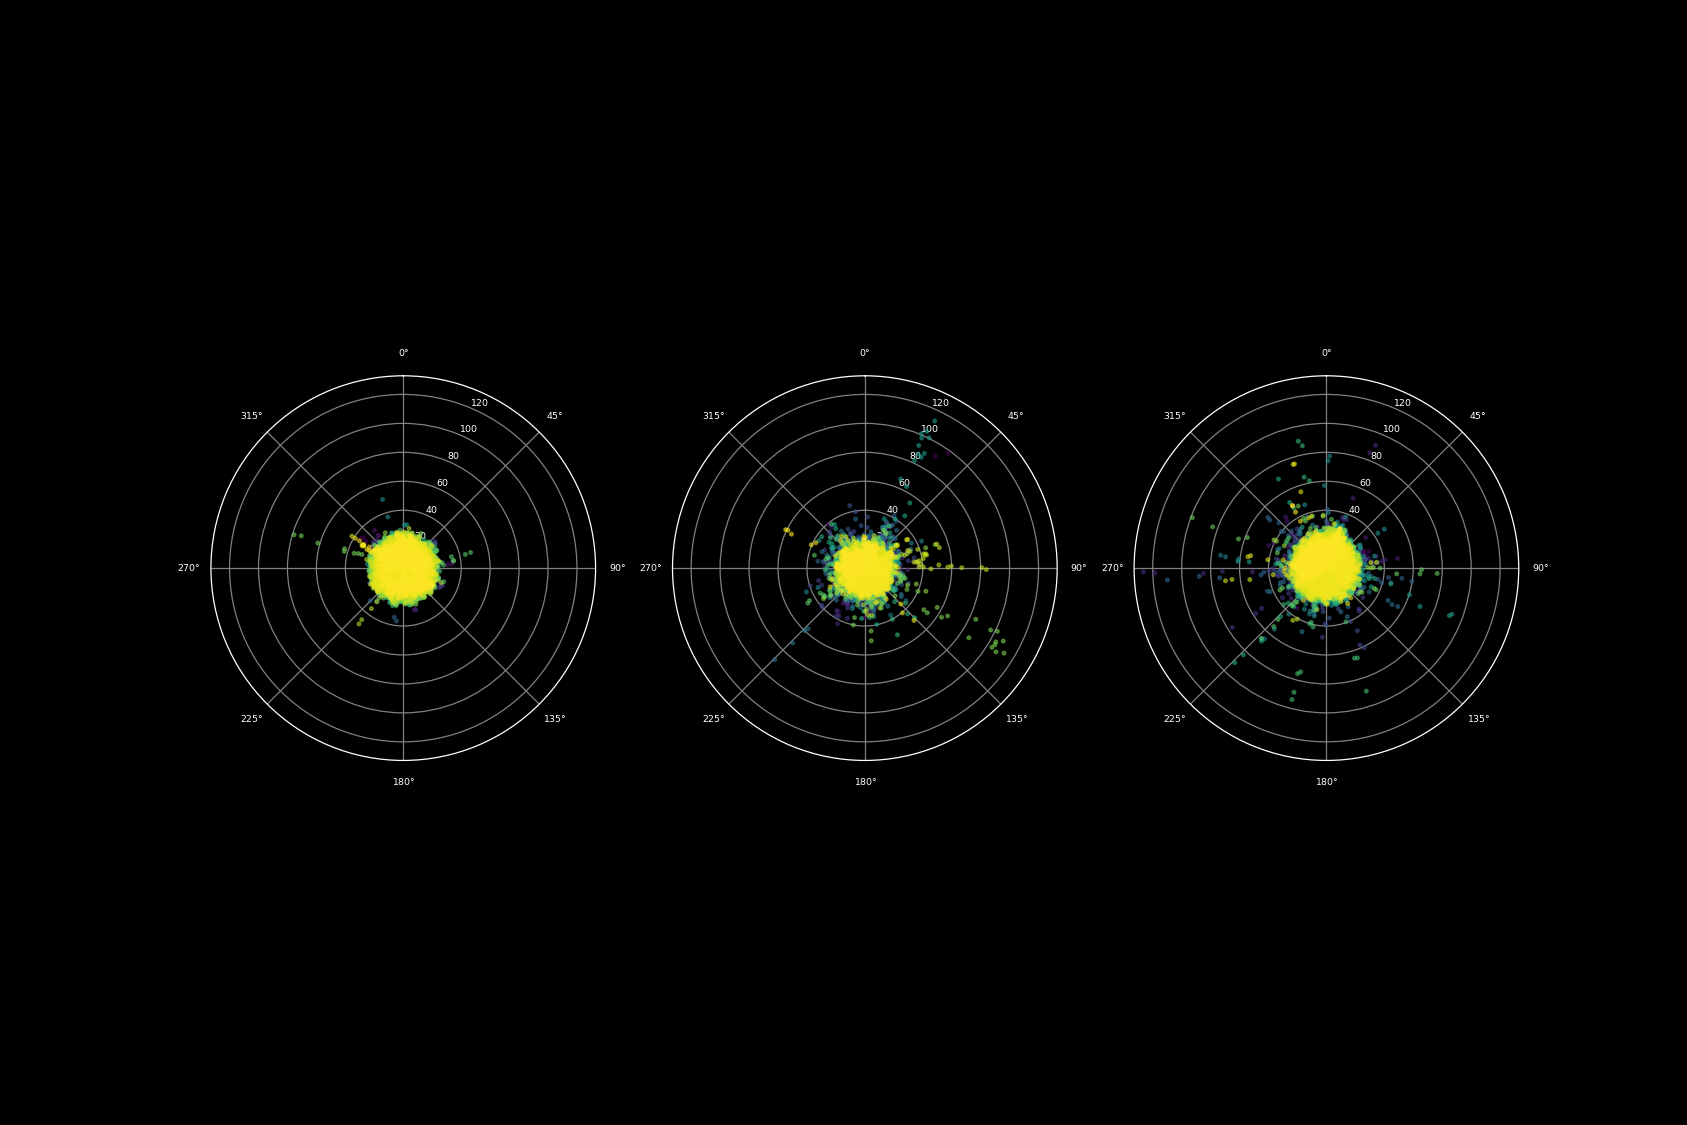

In [370]:
#fig, ax = pl.subplots()

df_ = df[df['filename']=='20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000'].copy()
print(df_.shape)

#sns.scatterplot(data=df_, x='ft_heading', y='speed', ax=ax, hue='duration_min', palette='viridis', edgecolor='none', alpha=0.5)

theta = df_['ft_heading'].values
r = df_['speed'].values
colors = df_['duration_min'].values

print(df_['condition'].unique())

fig, axn = pl.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(15,10), sharex=True, sharey=True)

#ax = fig.add_subplot(projection='polar')
for fi, (fn, df_) in enumerate(df.groupby('condition')):
    ax=axn[fi]
    theta = df_['ft_heading'].values
    r = df_['speed'].values
    colors = df_['duration_min'].values

    c = ax.scatter(theta, r, c=colors, s=5, cmap='viridis', alpha=0.5)
    ax.set_theta_offset(0)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1) 


In [ ]:
fig, ax = pl.subplots()


In [213]:
#fpath = '20230214-143528_P1_activation_fly1vM-cs-4do_004'

# fnames = ['20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000', '20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000']

fnames = ['20230214-135500_P1_activation_fly1vM-cs-4do_002', '20230214-143528_P1_activation_fly1vM-cs-4do_004']

currdf = df[df['filename'].isin(fnames)].copy()
currdf.shape

(459408, 41)

<IPython.core.display.Javascript object>


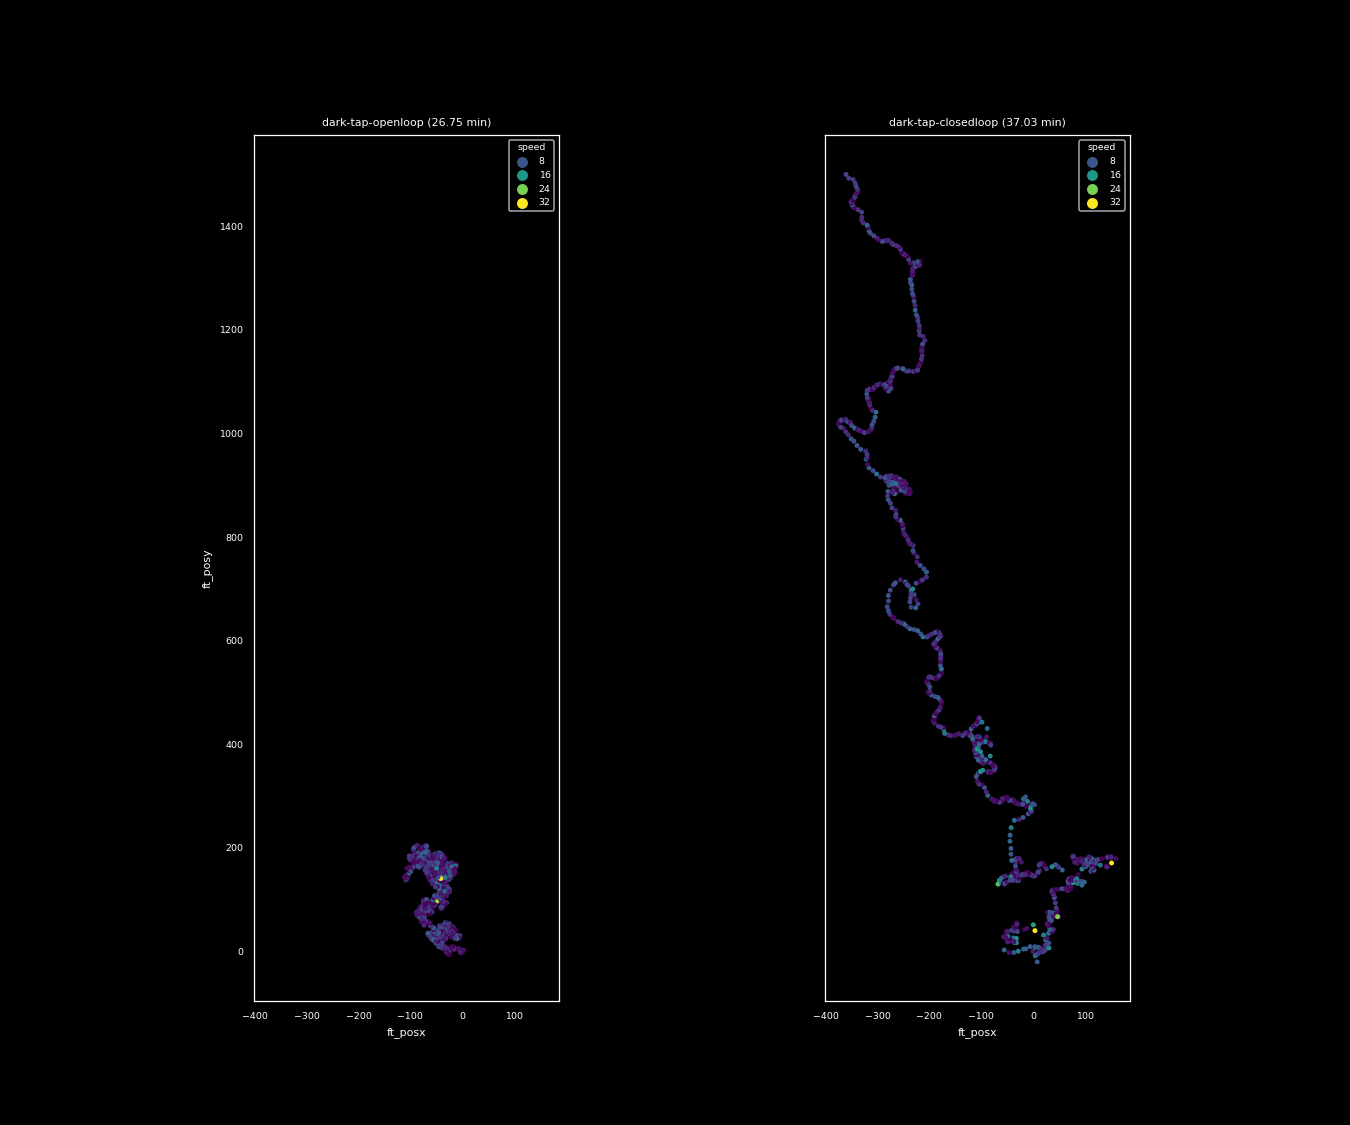

In [217]:
fig, axn = pl.subplots(1, 2, figsize=(12,10), sharex=True, sharey=True)

for fi, (fn, df_) in enumerate(currdf.groupby('filename')):
    ax=axn[fi]
    exp_dur = df_['rel_time'].max() / 60.
    curr_cond = df_['condition'].unique()[0]

    #ax.plot(df0['ft_posx'], df0['ft_posy'], lw=0.5, c='w')
    sns.scatterplot(data=df_.iloc[0::200], ax=ax, x='ft_posx', y='ft_posy', hue='speed', hue_norm=(0, 30), palette='viridis', edgecolor='none', s=10, alpha=1)
    ax.set_title('{} ({:.2f} min)'.format(curr_cond, exp_dur))
    ax.set_aspect(1)

<IPython.core.display.Javascript object>


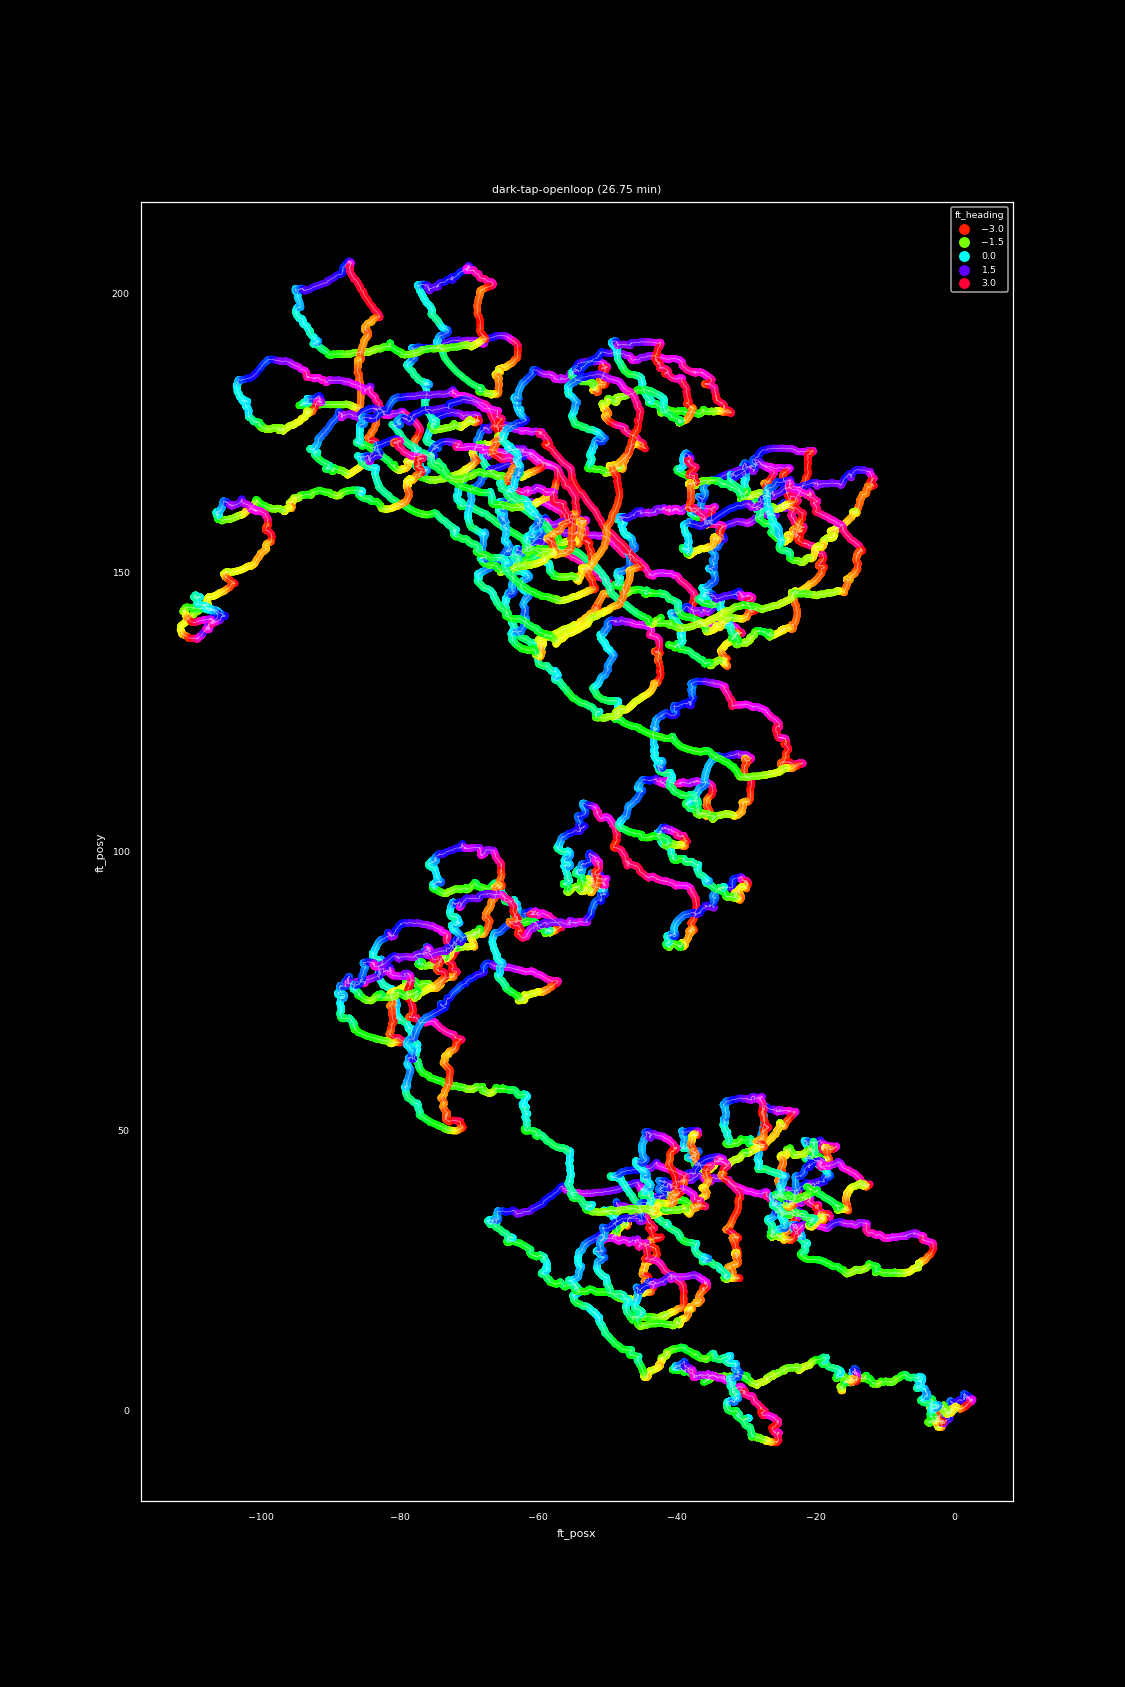

Text(0.5, 1.0, 'dark-tap-openloop (26.75 min)')

In [233]:
fname = '20230214-135500_P1_activation_fly1vM-cs-4do_002'
df_ = currdf[currdf['filename']==fname].copy()


fig, ax = pl.subplots(figsize=(10,15))


exp_dur = df_['rel_time'].max() / 60.
curr_cond = df_['condition'].unique()[0]

ax.plot(df_['ft_posx'], df_['ft_posy'], lw=0.5, c='w', alpha=0.5)
sns.scatterplot(data=df_.iloc[0::1], ax=ax, x='ft_posx', y='ft_posy', hue='ft_heading', palette='hsv', edgecolor='none', s=20, alpha=1)
ax.set_title('{} ({:.2f} min)'.format(curr_cond, exp_dur))
#ax.set_aspect(1)

<IPython.core.display.Javascript object>


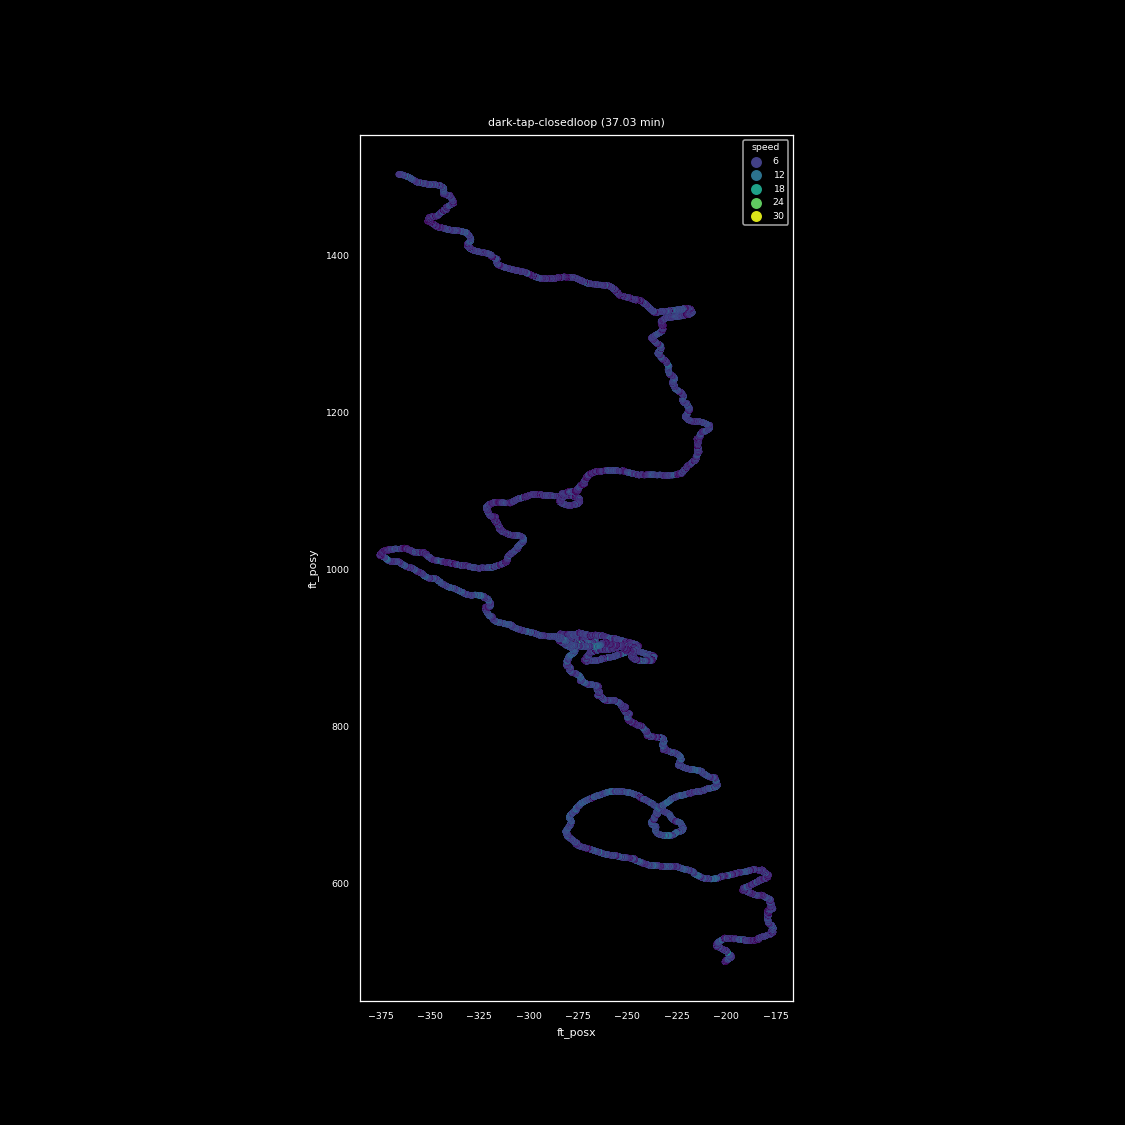

In [81]:
plotdf = df_[df_['ft_posy']>=500].copy()

fig, ax = pl.subplots(figsize=(10,10))
sns.scatterplot(data=plotdf, ax=ax, x='ft_posx', y='ft_posy', hue='speed',
               edgecolor='none', s=15, alpha=0.8, palette='viridis') #, hue_norm=(speed_min, speed_max)
ax.set_title('{} ({:.2f} min)'.format(curr_cond, dur_min))
ax.set_box_aspect(2)